<a href="https://colab.research.google.com/github/jmuzquiz/ABTestingProject/blob/main/Housing_Price_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing and Exploration
**Initial Setup**

In [ ]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn as sk #import separately later

In [ ]:
#loading the dataset
#target variable is median house value
#going to try to predict house value based on other features

data = pd.read_csv("housing.csv")

In [ ]:
#initial view of the data
data
#ocean proximity will need to be preprocessed
#because the text cannot be fed into model like this
#others will probably need to be scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**Handling Missing Values**


In [ ]:
#check for missing values
data.info()
#total bedrooms has some missing
#not that many, we will drop them
#note the column types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#drop missing values
data.dropna(inplace = True)
#df has less rows now

In [ ]:
data.info() #worked

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
#split the data into test and train data and x and y data
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1) #say axis =1 since we are dropping column
y = data['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #80/20 split
#test set needed to evaluate models

###Exploratory Data Analysis
**Combining Training Data**

In [ ]:
#combine to make the full train data
train_data = X_train.join(y_train)

In [ ]:
#taking a look at it
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17463,-119.88,34.43,16.0,2206.0,541.0,1227.0,554.0,3.7500,NEAR OCEAN,223100.0
3234,-119.59,36.11,32.0,752.0,159.0,524.0,155.0,2.2500,INLAND,50000.0
3346,-120.96,41.12,29.0,779.0,136.0,364.0,123.0,2.5000,INLAND,59200.0
14820,-117.11,32.67,46.0,928.0,236.0,790.0,235.0,1.6806,NEAR OCEAN,92500.0
651,-122.13,37.72,45.0,2315.0,451.0,1006.0,444.0,3.5240,NEAR BAY,186200.0
...,...,...,...,...,...,...,...,...,...,...
17073,-122.19,37.48,35.0,7067.0,1646.0,5380.0,1597.0,4.1776,NEAR BAY,265300.0
1551,-121.94,37.75,16.0,5121.0,735.0,2464.0,761.0,6.6204,<1H OCEAN,296100.0
6366,-118.00,34.16,42.0,1020.0,156.0,398.0,157.0,6.1010,INLAND,311800.0
19831,-119.38,36.56,25.0,1180.0,222.0,611.0,212.0,2.0729,INLAND,84700.0


**Visualizing Distributions of Numerical Variables**

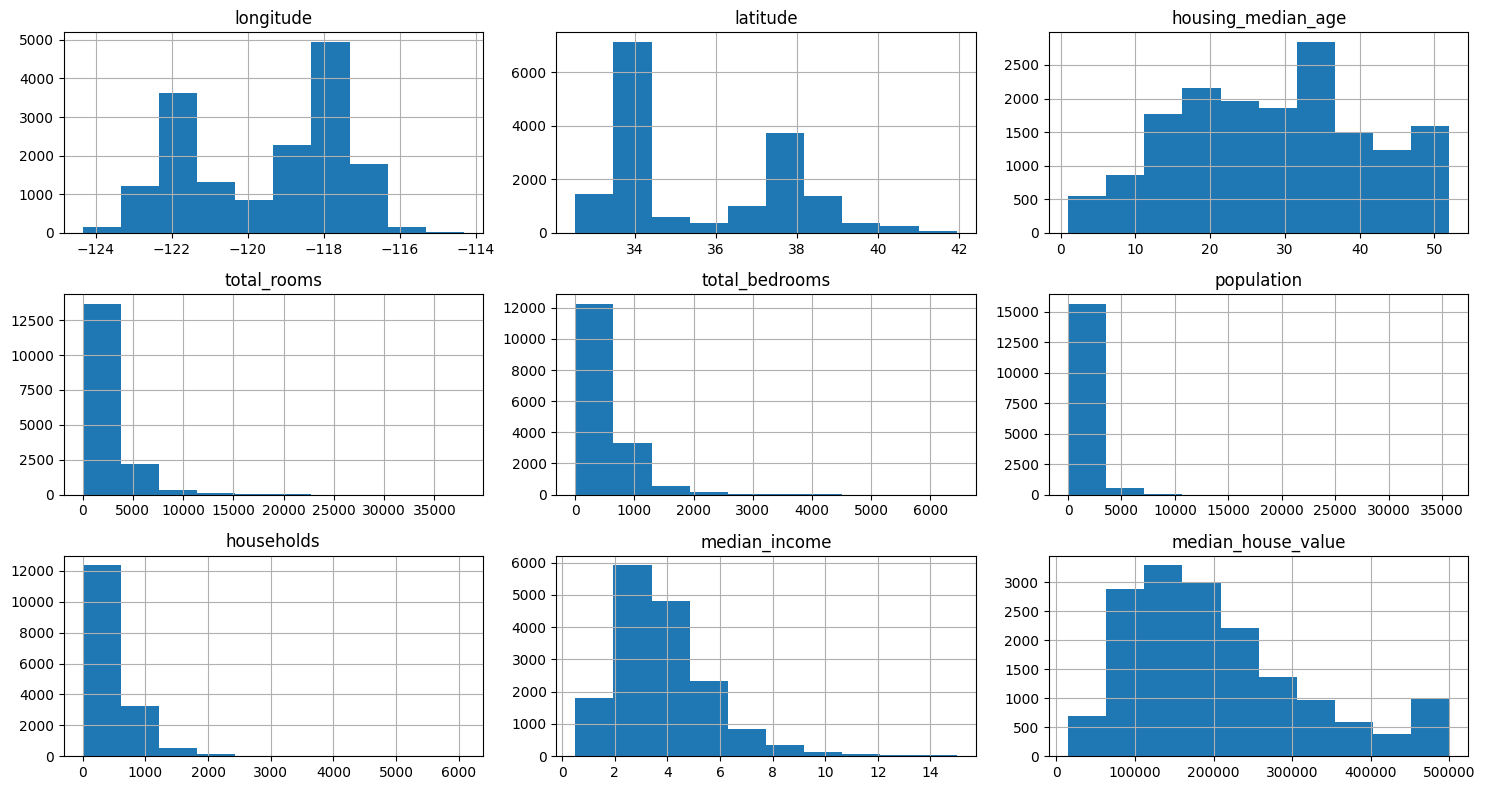

In [ ]:
#basic exploration of numeric variables (not ocean proximity)
train_data.hist(figsize = (15,8))

plt.tight_layout()

#plt.savefig('histograms.png')

plt.show()

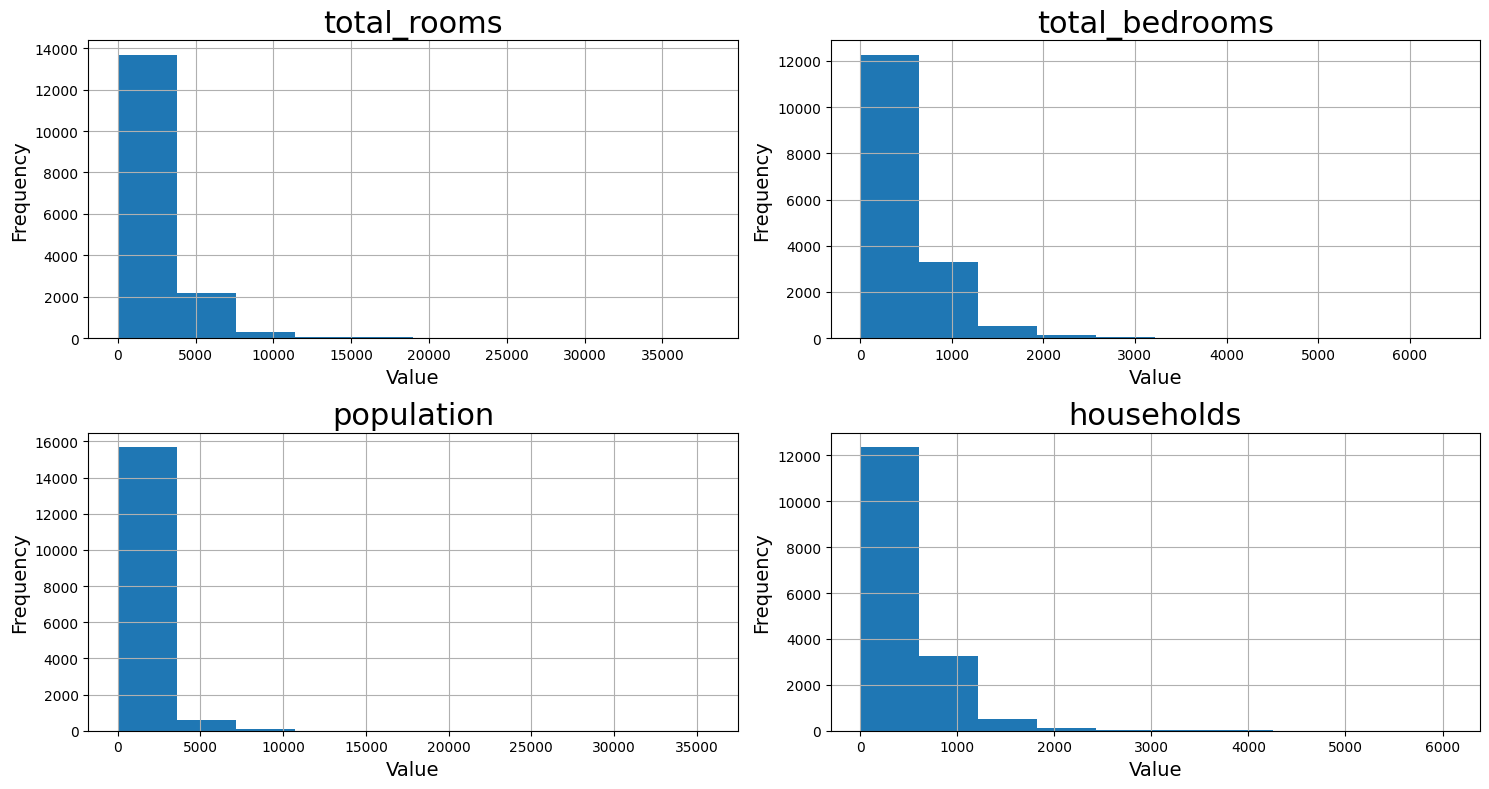

In [ ]:
#four columns that will need to be log transformed later
columns_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households']

#plot histograms for the specified columns
axes = train_data[columns_to_plot].hist(figsize=(15, 8))

#set title and label sizes
for ax in axes.flatten():
    ax.title.set_fontsize(22)
    ax.set_xlabel('Value', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
#plt.savefig('four_histograms.png')
plt.show()

**Correlation of Numerical Variables with Target Variable**

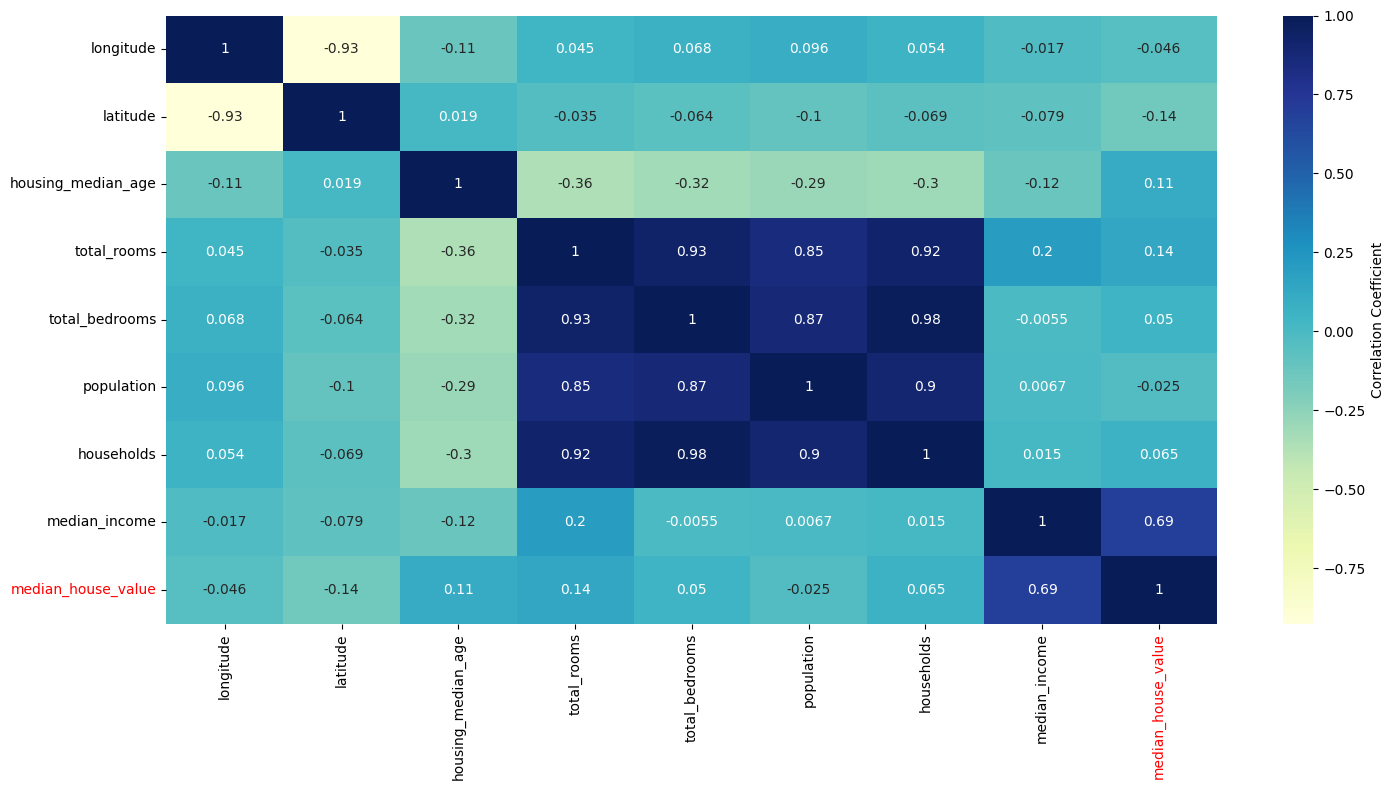

In [ ]:
#select only numerical columns
numerical_train_data = train_data.select_dtypes(include=np.number)

#calculate the correlation matrix
correlation_matrix = numerical_train_data.corr()

#create the heatmap
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Coefficient'})

#customize the x and y axis tick labels
#this makes median_house_value show in red
for tick_label in heatmap.get_xticklabels():
    if tick_label.get_text() == 'median_house_value':
        tick_label.set_color('red')

for tick_label in heatmap.get_yticklabels():
    if tick_label.get_text() == 'median_house_value':
        tick_label.set_color('red')

plt.tight_layout()

#plt.savefig('corr_heatmap.png')

plt.show()


**Log Transformation of Variables**

In [ ]:
#many hists are right-skewed (take log)
#there was also bimodal data, explore later

train_data['total_rooms'] = np.log(train_data['total_rooms'] +1) #to avoid zero values
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)

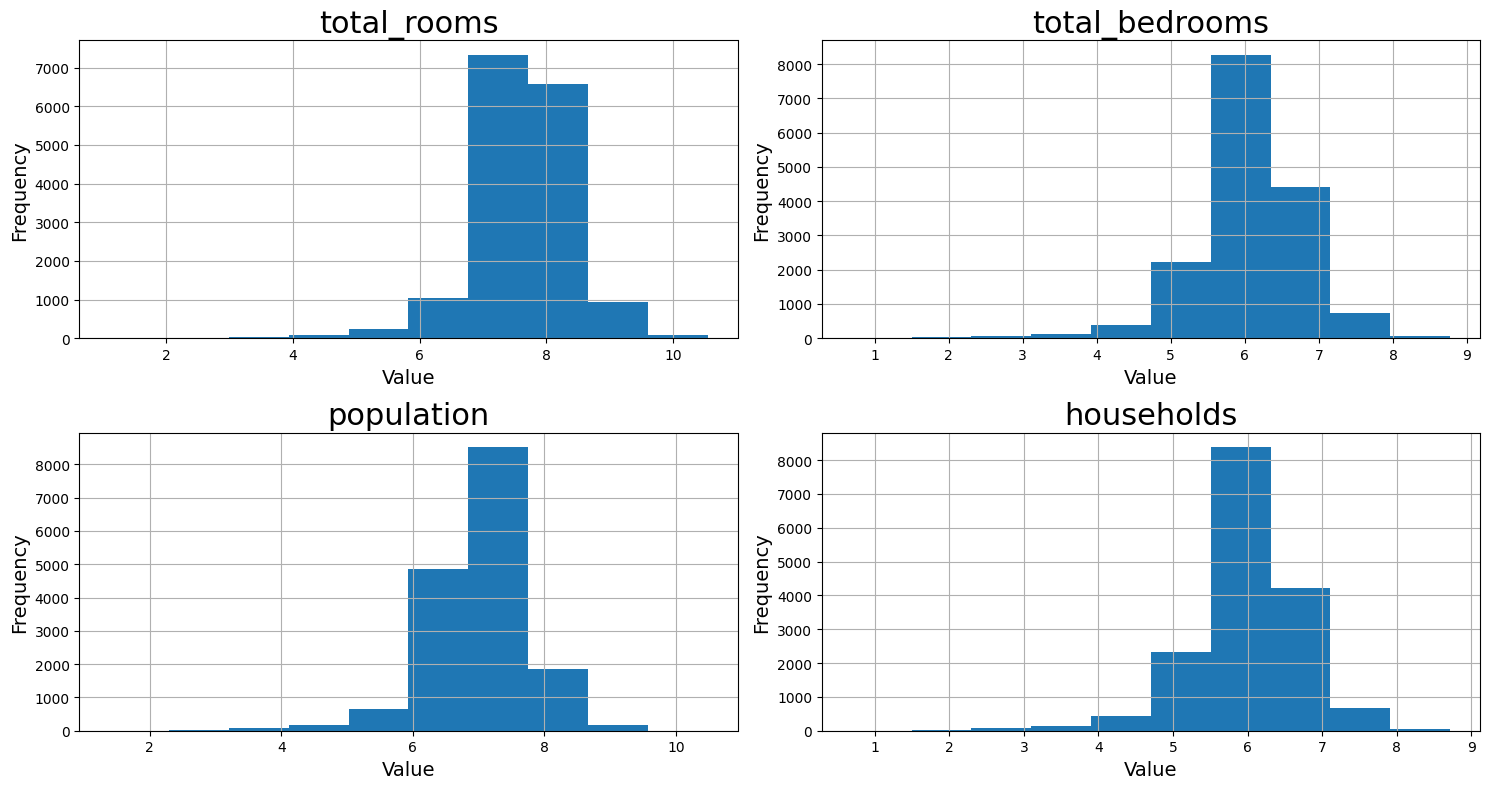

In [ ]:
#the log transformed variables look more normal now
#the four transformed columns
columns_to_plot = ['total_rooms', 'total_bedrooms', 'population', 'households']

#plot histograms for the specified columns after transformation
axes = train_data[columns_to_plot].hist(figsize=(15, 8))

#set title and label sizes
for ax in axes.flatten():
    ax.title.set_fontsize(22)
    ax.set_xlabel('Value', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
#plt.savefig('four_histograms_log.png')
plt.show()

**Visualizing Distribution of Categorical Variables**

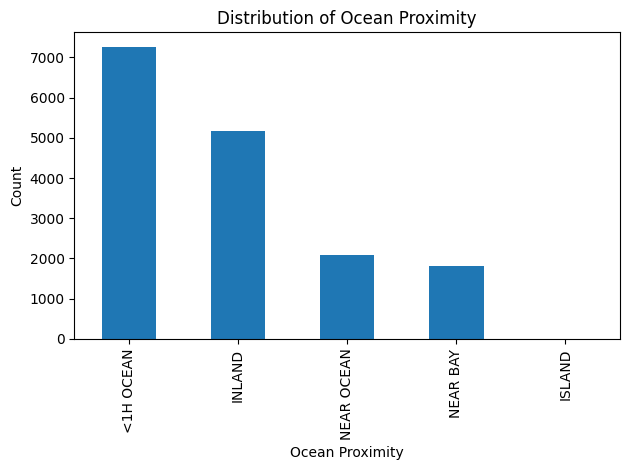

In [ ]:
#have to deal with ocean proximity now
#using one hot encoding
#checked the distribution of categories
train_data['ocean_proximity'].value_counts().plot(kind='bar')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Distribution of Ocean Proximity')
plt.tight_layout()
#plt.savefig('ocean_proximity_bar.png')
plt.show()

In [ ]:
train_data['ocean_proximity'].value_counts() #island has 4 counts
#if island has all 5 instances in train, 0 in test, things won't work

,count
ocean_proximity,
<1H OCEAN,7261
INLAND,5179
NEAR OCEAN,2079
NEAR BAY,1823
ISLAND,4


**Applying One-Hot Encoding**

In [ ]:
#one hot encoding
dummies = pd.get_dummies(train_data.ocean_proximity)
#convert the boolean values to integers (0 and 1)
dummies = dummies.astype(int)

#make sure it worked
print(dummies)

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
17463          0       0       0         0           1
3234           0       1       0         0           0
3346           0       1       0         0           0
14820          0       0       0         0           1
651            0       0       0         1           0
...          ...     ...     ...       ...         ...
17073          0       0       0         1           0
1551           1       0       0         0           0
6366           0       1       0         0           0
19831          0       1       0         0           0
16854          0       0       0         0           1

[16346 rows x 5 columns]


In [ ]:
#add new binary columns
#no longer need ocean_proximity
train_data = train_data.join(dummies).drop('ocean_proximity', axis = 1)

In [ ]:
#checking that it worked
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17463,-119.88,34.43,16.0,7.699389,6.295266,7.113142,6.318968,3.7500,223100.0,0,0,0,0,1
3234,-119.59,36.11,32.0,6.624065,5.075174,6.263398,5.049856,2.2500,50000.0,0,1,0,0,0
3346,-120.96,41.12,29.0,6.659294,4.919981,5.899897,4.820282,2.5000,59200.0,0,1,0,0,0
14820,-117.11,32.67,46.0,6.834109,5.468060,6.673298,5.463832,1.6806,92500.0,0,0,0,0,1
651,-122.13,37.72,45.0,7.747597,6.113682,6.914731,6.098074,3.5240,186200.0,0,0,0,1,0


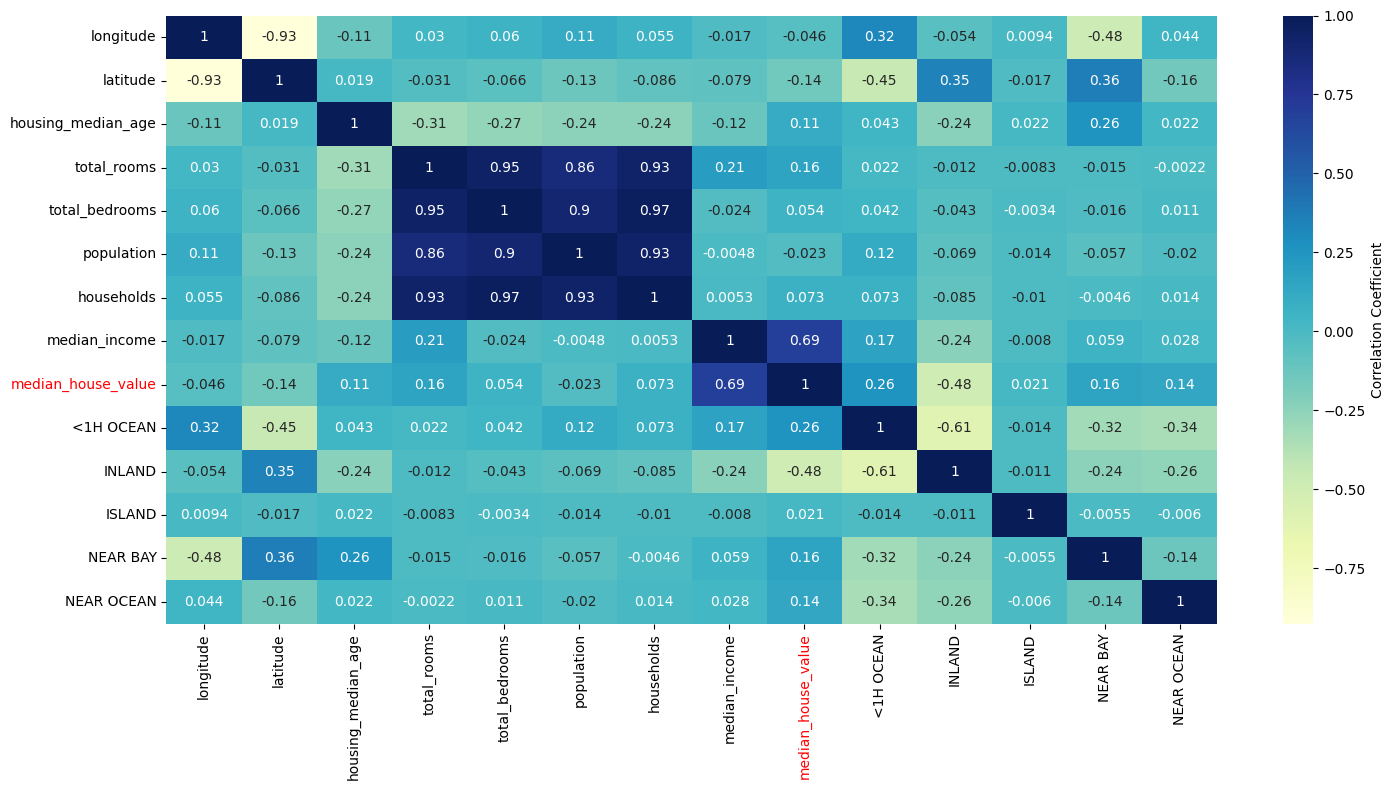

In [ ]:
#this second heatmap
#has the log transformed variables
#and the one hot encoded variables

#create the heatmap
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Coefficient'})

#customize the x and y axis tick labels
#this makes median_house_value label red again
for tick_label in heatmap.get_xticklabels():
    if tick_label.get_text() == 'median_house_value':
        tick_label.set_color('red')

for tick_label in heatmap.get_yticklabels():
    if tick_label.get_text() == 'median_house_value':
        tick_label.set_color('red')

plt.tight_layout()

#plt.savefig('corr_heatmap_log_encoded.png')

plt.show()

#<1H OCEAN and INLAND have strongest correlations with median_house_value

**Visualization of Coordinates**

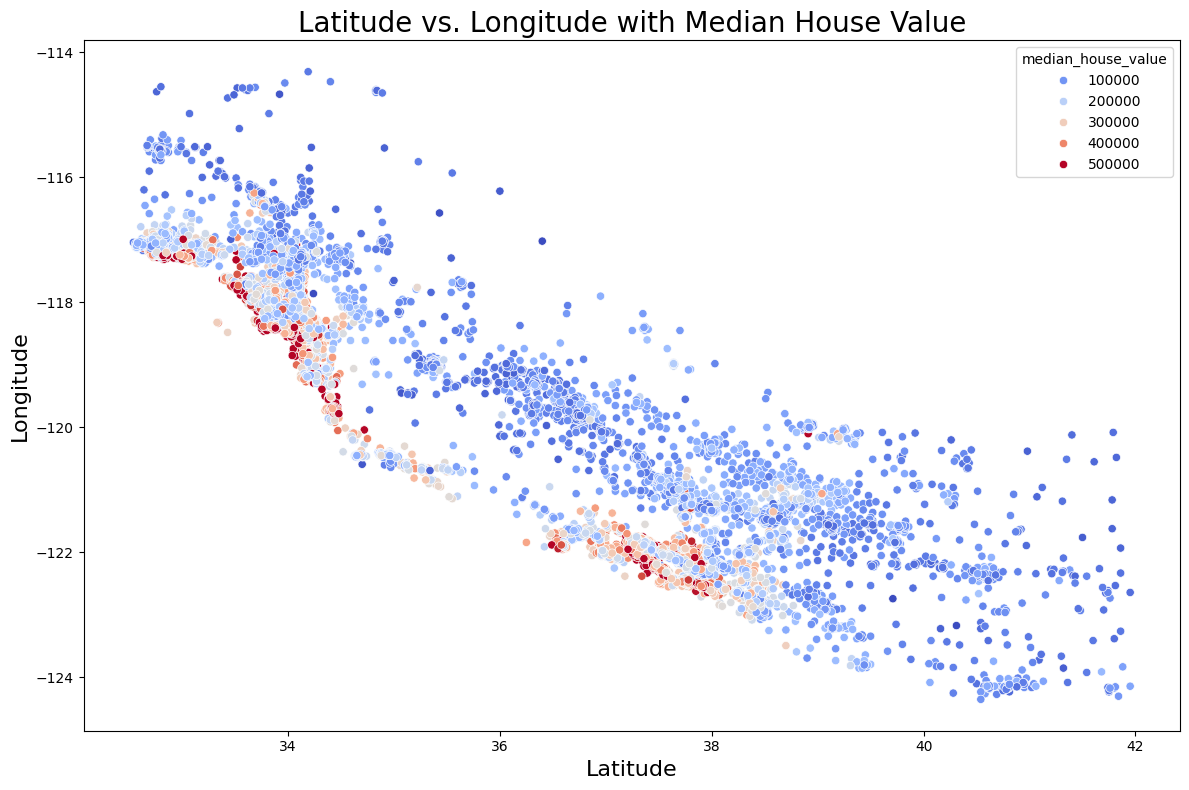

In [ ]:
#location seems relevant to house value
#visualization of the coordinates
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = train_data,
                hue = 'median_house_value', palette='coolwarm')
#set the x and y labels and title font size
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Longitude', fontsize=16)
plt.title('Latitude vs. Longitude with Median House Value', fontsize=20)

plt.tight_layout()
#plt.savefig('location_scatterplot.png')
plt.show()
#red is touching the coast (more expensive)
#blue housing is more inland (less expensive)

**Feature Engineering**

In [ ]:
#how many rooms are bedrooms? new feature
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
#how many rooms per household? (these are by block) new feature
train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']

#tried these below but their correlation was low or near zero
#did not think they would add value to this analysis
#train_data['population_density_per_room'] = data['population'] / data['total_rooms']
#train_data['population_density_per_household'] = data['population'] / data['households']

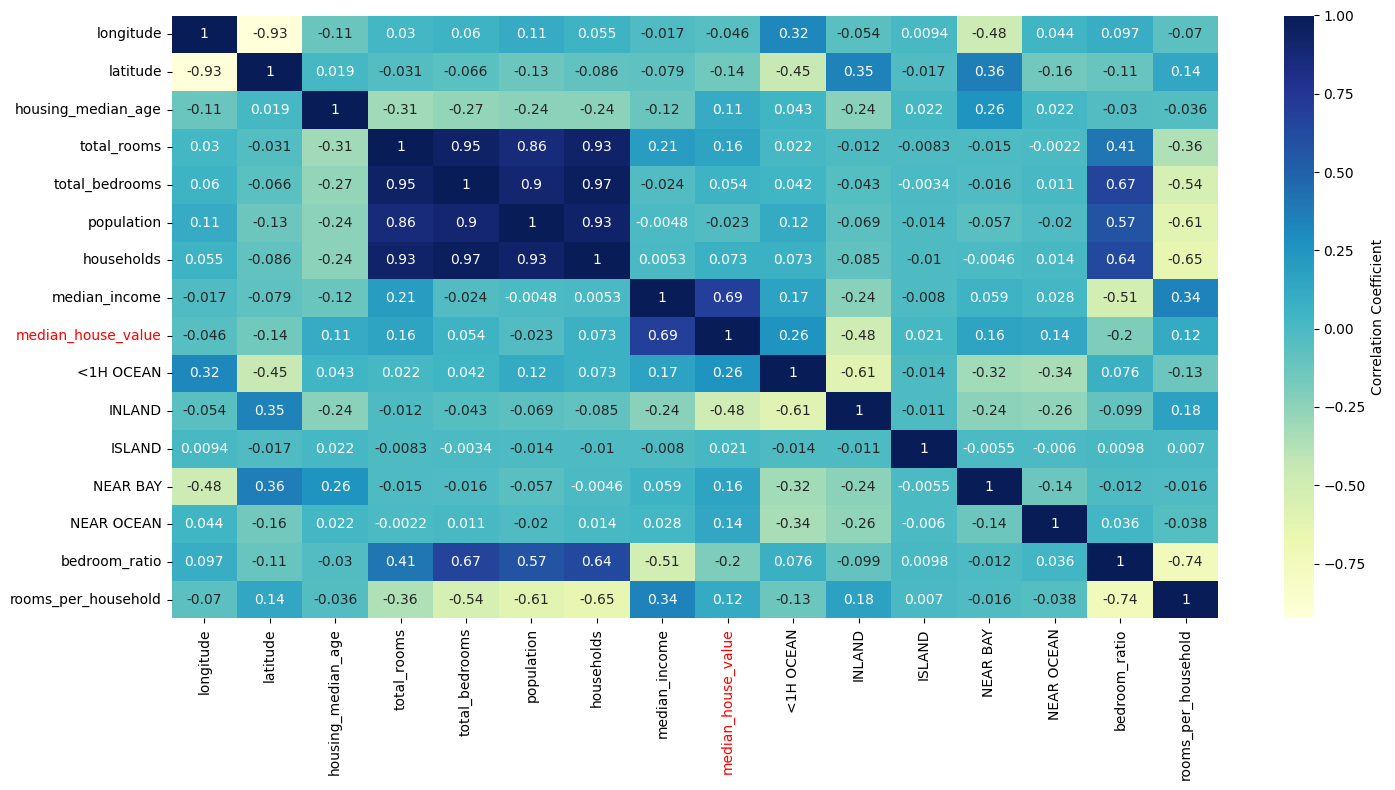

In [ ]:
#third and final heatmap with log transformed, one hot encoded, and engineered features
#create the heatmap
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Coefficient'})

#customize the x and y axis tick labels
#this makes median_house_value label red again
for tick_label in heatmap.get_xticklabels():
    if tick_label.get_text() == 'median_house_value':
        tick_label.set_color('red')

for tick_label in heatmap.get_yticklabels():
    if tick_label.get_text() == 'median_house_value':
        tick_label.set_color('red')

plt.tight_layout()

#plt.savefig('corr_heatmap_log_encoded_engineered.png')

plt.show()

#bedroom ratio negative corr with median house value
#total bedrooms wasn't that interesting before
#bedroom ration is a better feature

#can be good to drop features with close to zero correlation
#consider stepwise selection in a later analysis (after this current project)

**Scaling the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#we don't have to do the train test split again, but since we added more features
#we have to do the x y split again
X_train, y_train = train_data.drop('median_house_value', axis = 1),
train_data['median_house_value']
#scale the train data
X_train_s = scaler.fit_transform(X_train)

**Applying Preprocessing to Test Data**

In [ ]:
#not going to do hyperparameter tuning for linear regression
#do same process to test that we did to train
#this would be better as a function instead of copy pasting or repeating code

#join the data into a data frame
test_data = X_test.join(y_test)

#log transform the same variables as we did for train
test_data['total_rooms'] = np.log(test_data['total_rooms'] +1) #to avoid zero values
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)

#one-hot encode the same variable as we did for train
test_dummies = pd.get_dummies(test_data.ocean_proximity)
#convert the boolean values to integers (0 and 1)
test_dummies = test_dummies.astype(int)
test_data = test_data.join(test_dummies).drop('ocean_proximity', axis = 1)

#perform the same feature engineering as we did for train
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']

In [ ]:
#split back into x and y
X_test, y_test = test_data.drop('median_house_value', axis = 1), test_data['median_house_value']

In [ ]:
#scale the test data
X_test_s = scaler.transform(X_test)

##Model Training
**Linear Regression**

In [ ]:
#start linear model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
test_data
#there was only 4 instances of island
#so checked to make sure that train and test both have 16 columns and they do

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,rooms_per_household
5949,-117.86,34.14,36.0,8.038512,6.504288,7.303170,6.453625,3.1905,235300.0,0,1,0,0,0,0.809141,1.245581
3942,-118.60,34.21,21.0,9.160415,7.848153,8.893298,7.778211,2.8039,227500.0,1,0,0,0,0,0.856746,1.177702
17448,-120.47,34.63,23.0,7.800573,6.139885,7.239215,6.075346,3.7917,142200.0,0,0,0,0,1,0.787107,1.283972
4202,-118.23,34.11,33.0,7.868254,6.472346,7.822845,6.408529,3.1330,156000.0,1,0,0,0,0,0.822590,1.227779
19129,-122.67,38.24,29.0,7.880426,6.142037,7.224753,6.111467,5.0544,261800.0,1,0,0,0,0,0.779404,1.289449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,-118.40,34.17,27.0,8.185629,6.815640,7.545390,6.770789,3.4013,286000.0,1,0,0,0,0,0.832635,1.208962
9392,-122.54,37.91,48.0,7.981050,6.194405,7.056175,6.226537,5.6302,489000.0,0,0,0,1,0,0.776139,1.281780
1939,-120.95,38.69,10.0,8.137980,6.335054,7.432484,6.302619,5.2032,217100.0,0,1,0,0,0,0.778455,1.291206
20070,-120.35,37.99,3.0,7.063048,5.726848,6.047372,5.231109,2.4191,217500.0,0,1,0,0,0,0.810818,1.350201


In [ ]:
#check the R^2
reg.score(X_test_s, y_test)
#not too bad but not too good
#probs better with random forest model

0.6550321765828647

In [ ]:
#use these later to compare with other models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#predictions and evaluation for Linear Regression
y_pred_lr = reg.predict(X_test_s)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

**Random Forest**

In [ ]:
#initial random forest with default parameters
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)
#took 18 seconds

RandomForestRegressor()

In [ ]:
#check R^2 to get an idea of fit
forest.score(X_test_s, y_test)

0.8061150958981493

In [ ]:
#predictions and evaluation for base Random Forest
y_pred_rf_base = forest.predict(X_test_s)
r2_rf_base = r2_score(y_test, y_pred_rf_base)
rmse_rf_base = np.sqrt(mean_squared_error(y_test, y_pred_rf_base))
mae_rf_base = mean_absolute_error(y_test, y_pred_rf_base)

##Hyperparamter Tuning

In [ ]:
#attempted gridsearchcv first but took way too long
#tried randomizedsearchcv with 540 fits, still way too long
#from sklearn.model_selection import RandomizedSearchCV

#param_grid = {
   # 'n_estimators': [100, 200, 300],
   # 'max_depth': [10, 20, 30, None],
   # 'min_samples_split': [2, 5, 10],
   # 'min_samples_leaf': [1, 2, 4]
#}

#forest = RandomForestRegressor(random_state=42)
#grid_search = RandomizedSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

#grid_search.fit(X_train_s, y_train)

#print the best parameters and the best score
#print("Best parameters found: ", grid_search.best_params_)
#print("Best cross-validation score (R^2): ", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [ ]:
#checked how long a single fit would take
#to try and guess how long all 540 fits would take
#2.5 hours deemed too long for this project
#would be fine for work project to get best results

import time
from sklearn.ensemble import RandomForestRegressor

#example single set of parameters
params = {
    'n_estimators': 100,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

#initialize the model with these parameters
forest = RandomForestRegressor(**params, random_state=42)

#start timing
start_time = time.time()

#fit the model on the training data
forest.fit(X_train_s, y_train)

#end timing
end_time = time.time()

#calculate the time taken
single_fit_time = end_time - start_time
print(f"Time taken for a single fit: {single_fit_time} seconds")

#estimate the total time
total_time = single_fit_time * 540
print(f"Estimated total time for 540 fits: {total_time / 60} minutes")


Time taken for a single fit: 17.701106786727905 seconds
Estimated total time for 540 fits: 159.30996108055115 minutes


In [ ]:
#tried with only 30 iterations with reduced params, still took too long
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import randint

#param_dist = {
    #'n_estimators': randint(100, 1000),
    #'max_depth': randint(10, 50),
    #'min_samples_split': randint(2, 10),
    #'min_samples_leaf': randint(1, 5)
#}

#forest = RandomForestRegressor(random_state=42)

#initialize RandomizedSearchCV with a reasonable number of iterations
#n_iter_search = 30  # You can adjust this number based on your preference

#random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist, n_iter=n_iter_search, cv=5, scoring='r2', n_jobs=-1, verbose=2, random_state=42)

#fit the RandomizedSearchCV to the training data
#random_search.fit(X_train_s, y_train)

#print the best parameters and best score
#print("Best parameters found with RandomizedSearchCV: ", random_search.best_params_)
#print("Best cross-validation score with RandomizedSearchCV (R^2): ", random_search.best_score_)
#still taking a long time

Fitting 5 folds for each of 30 candidates, totalling 150 fits


KeyboardInterrupt: 

**Main Code Used for Hyperparameter Tuning**

In [ ]:
#decided to hypertune on a smaller subset of training data
#print the shape of X_train and y_train
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in y_train:", y_train.shape[0])

#random 5000 subset
#further split the training set to create a smaller subset for faster computation
#using underscores to ignore the remaining parts of the split
X_train_small, _, y_train_small, _ = train_test_split(X_train_s, y_train, train_size=5000, random_state=42, shuffle=True)

#print the shape of the smaller subset to confirm
print("Number of samples in X_train_small:", X_train_small.shape[0])
print("Number of samples in y_train_small:", y_train_small.shape[0])




Number of samples in X_train: 16346
Number of samples in y_train: 16346
Number of samples in X_train_small: 5000
Number of samples in y_train_small: 5000


In [ ]:
#step 2
#okay first ran next code snippet (starts with import time) with n_iter_search = 5, then ran this code snippet, then ran below code again with 30
#because 10 minutes is acceptable
#which is what was estimated based on this code snippet

#estimate the time for the full search
n_iter_search_full = 30  #full number of iterations
estimated_total_time_full = (total_time / n_iter_search) * n_iter_search_full
print(f"Estimated total time for RandomizedSearchCV with {n_iter_search_full} iterations: {estimated_total_time_full / 60:.2f} minutes")

Estimated total time for RandomizedSearchCV with 30 iterations: 10.58 minutes


In [ ]:
#step 1 and 3
#finally got this to run in an acceptable amount of time
#with randomizedsearchcv over gridsearchcv
#on a smaller subset of train data
#on a reduced parameter range
#with fewer iterations

import time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#define the parameter distributions with narrower ranges
param_dist = {
    'n_estimators': randint(100, 500),  #reduced range
    'max_depth': randint(10, 30),       #reduced range
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

#initialize the model
forest = RandomForestRegressor(random_state=42)

#set up RandomizedSearchCV
n_iter_search = 30  #adjust as needed
random_search = RandomizedSearchCV(estimator=forest, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='r2', n_jobs=-1, verbose=2, random_state=42)

#start timing
start_time = time.time()

#fit the RandomizedSearchCV to the reduced training data
random_search.fit(X_train_small, y_train_small)

#end timing
end_time = time.time()

#calculate the time taken
total_time = end_time - start_time
print(f"Total time for RandomizedSearchCV with 30 iterations: {total_time / 60:.2f} minutes")

#print the best parameters and best score
print("Best parameters found with RandomizedSearchCV: ", random_search.best_params_)
print("Best cross-validation score with RandomizedSearchCV (R^2): ", random_search.best_score_)

#got this with n_iter_search = 5
#Fitting 3 folds for each of 5 candidates, totalling 15 fits
#Total time for RandomizedSearchCV with 30 iterations: 1.81 minutes
#Best parameters found with RandomizedSearchCV:  {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 314}
#Best cross-validation score with RandomizedSearchCV (R^2):  0.7635666128493787


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Total time for RandomizedSearchCV with 30 iterations: 11.90 minutes
Best parameters found with RandomizedSearchCV:  {'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 426}
Best cross-validation score with RandomizedSearchCV (R^2):  0.7587317638773197


In [ ]:
#retrain the model on the full dataset with the best parameters
best_forest = random_search.best_estimator_
best_forest.fit(X_train_s, y_train)
score = best_forest.score(X_test_s, y_test)
print(f"R^2 score on test data: {score}")
#took 1 min

R^2 score on test data: 0.8100068258172628


In [ ]:
#predictions and evaluation for the tuned Random Forest
y_pred_rf_tuned = best_forest.predict(X_test_s)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)

##Model Evaluation
**Comparison of R^2, RMSE, and MAE Metrics**

In [ ]:
#create a DataFrame to display the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Base Random Forest', 'Tuned Random Forest'],
    'R^2': [r2_lr, r2_rf_base, r2_rf_tuned],
    'RMSE': [rmse_lr, rmse_rf_base, rmse_rf_tuned],
    'MAE': [mae_lr, mae_rf_base, mae_rf_tuned]
})

print(results)

                 Model       R^2          RMSE           MAE
0    Linear Regression  0.655032  67787.206688  48528.442689
1   Base Random Forest  0.806115  50819.506353  32871.983496
2  Tuned Random Forest  0.810007  50306.886923  32503.304391


**Comparison of Predicted vs Actual Values**

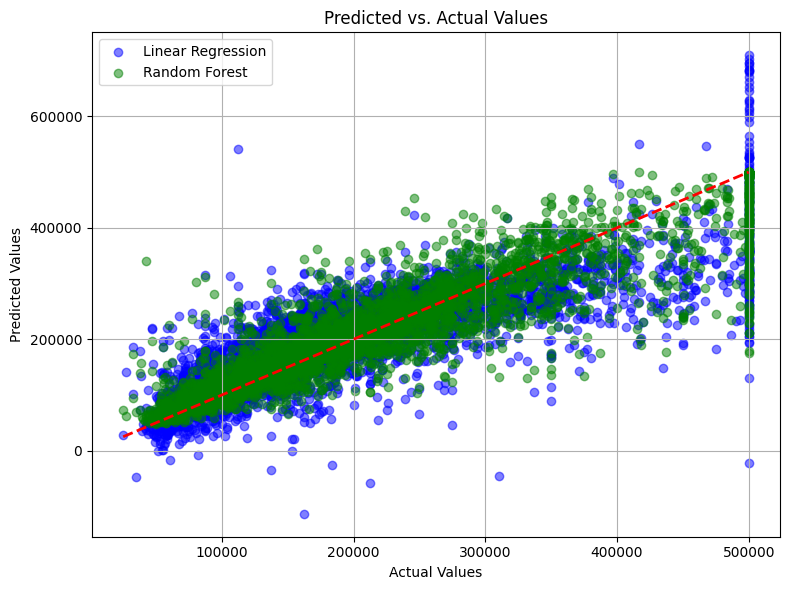

In [ ]:
#predictions
y_pred_linear = reg.predict(X_test_s)
y_pred_forest = best_forest.predict(X_test_s)

#scatter plot for linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5, label='Linear Regression')

#scatter plot for random forest
plt.scatter(y_test, y_pred_forest, color='green', alpha=0.5, label='Random Forest')

#plotting the diagonal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
#plt.savefig('predicted_vs_actual.png')
plt.show()


##Feature Importance

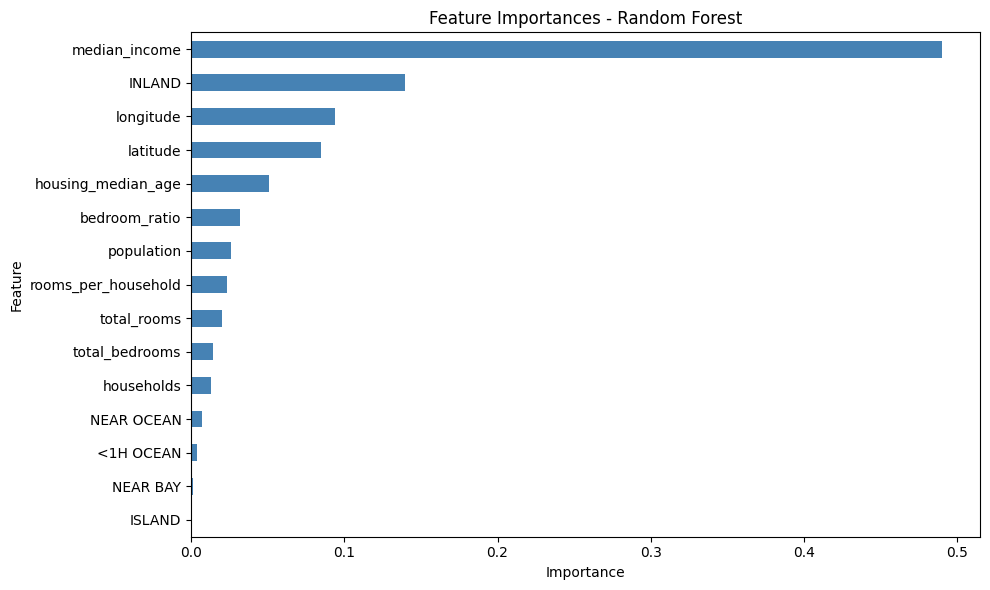

In [ ]:
#access feature importances
importances = best_forest.feature_importances_

#match importances to features
feature_names = X_train.columns  #used X_train because X_train_s gave me issues
feature_importances = pd.Series(importances, index=feature_names)

#sort and visualize
sorted_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='barh', color='#4682B4')
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis() #reverse y-axis order to have most important at top
plt.tight_layout()
#plt.savefig('feature_importances.png')
plt.show()

In [ ]:
#code to get the actual importance numbers
#sort and display the top features with their importance scores
sorted_importances = feature_importances.sort_values(ascending=False)
print(sorted_importances)

#if need exact numbers for specific features:
#for feature in ['median_income', 'INLAND', 'longitude', 'latitude', 'housing_median_age']:
    #print(f"{feature}: {feature_importances[feature]}")


median_income          0.490469
INLAND                 0.139774
longitude              0.093725
latitude               0.084670
housing_median_age     0.050796
bedroom_ratio          0.031770
population             0.026273
rooms_per_household    0.023593
total_rooms            0.020321
total_bedrooms         0.013999
households             0.013057
NEAR OCEAN             0.006804
<1H OCEAN              0.003596
NEAR BAY               0.000983
ISLAND                 0.000172
dtype: float64
median_income: 0.49046856895092134
INLAND: 0.1397740631228713
longitude: 0.09372524996850755
latitude: 0.08466975229690495
housing_median_age: 0.050795529765761176


In [ ]:
#try xgboost, neural network when I revisit this project